In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D
import os
import shutil
from _utils import *

In [2]:
# Set default sizes for figures.
plt.style.use("default") # style matplotlib
plt.rc("axes", labelsize = 12) # fontsize of the x and y labels
plt.rc("axes", titlesize = 15) # fontsize of the axes title
plt.rc("xtick", labelsize = 12) # fontsize of the tick labels
plt.rc("ytick", labelsize = 12) # fontsize of the tick labels
plt.rc("legend", fontsize = 12) # legend fontsize

In [3]:
dir_results = "./Yemen/output_test"
dir_hyper_params = "./Yemen/output_hyperparameter_tuning"
dir_output = "./Yemen/images"

In [4]:
if os.path.exists(dir_output):
    shutil.rmtree(dir_output) 
os.makedirs(dir_output)

## Hyper-parameters tuning results

In [5]:
hyper_params = pd.read_csv(dir_hyper_params + "/hyperparameter_tuning.csv")

result = hyper_params.groupby(["split", "h"]).apply(lambda x: x["loss_to_minimize"].idxmin())
best_result = hyper_params.loc[result].set_index(["split", "h"])
best_result.head()

1 Month Anomaly Rainfalls (%)  Code  Day  FCG  Fatalities  Month  \
split h                                                                     
1     1                              0     1    1    1           1      1   
      2                              1     1    1    1           0      1   
      3                              1     1    1    1           0      1   
      4                              0     1    1    1           1      1   
      5                              1     1    1    1           0      1   

         NDVI Anomaly  Population  Price cereals and tubers  Rainfalls (mm)  \
split h                                                                       
1     1             0           1                         0               1   
      2             1           1                         1               0   
      3             1           1                         0               1   
      4             1           1                         1               1   
      5             1           1                         1               0   

         ...  subsample  attempt  train_loss  val_loss  r2_train    r2_val  \
split h  ...                                                                 
1     1  ...       0.75      421    1.717589  1.681728  0.985352  0.984624   
      2  ...       0.80      581    3.228974  3.354923  0.972458  0.969403   
      3  ...       0.60      509    4.732039  5.075538  0.959646  0.953710   
      4  ...       0.70      148    6.132919  6.810659  0.947711  0.937886   
      5  ...       0.85      223    7.617489  8.530887  0.935080  0.922197   

         shape_train   shape_val  r2_difference  loss_to_minimize  
split h                                                            
1     1   (9360, 24)  (1060, 24)       0.000728          0.004904  
      2   (9360, 20)  (1040, 20)       0.003055          0.010401  
      3   (9340, 23)  (1040, 23)       0.005935          0.016261  
      4   (9320, 26)  (1040, 26)       0.009825          0.022564  
      5   (9300, 20)  (1040, 20)       0.012882          0.028494  

[5 rows x 30 columns]

In [6]:
shapes = best_result[["shape_train", "shape_val"]].applymap(lambda x: eval(x)).unstack(0).reorder_levels([1, 0], axis = 1).sort_index(axis = 1, level = [0, 1])

In [7]:
shapes_list = list()
def decompose(x):
    dec = x.apply(pd.Series)
    dec.columns = pd.MultiIndex.from_product([[x.name[0]], [x.name[1], x.name[1] + "_features"]], names = ["Split", "Info"])
    shapes_list.append(dec)

shapes.apply(decompose)
shapes_list = pd.concat(shapes_list, axis = 1).rename({"shape_train": "train_points", "shape_val": "val_points", 
                                                       "shape_train_features": "features"}, axis = 1, level = 1)
shapes_list.drop("shape_val_features", axis = 1, level = 1, inplace = True)
shapes_list.head()

Split           1                                2                       \
Info  train_points features val_points train_points features val_points   
h                                                                         
1             9360       24       1060         9900       17       1100   
2             9360       20       1040         9880       23       1100   
3             9340       23       1040         9860       21       1100   
4             9320       26       1040         9840       21       1100   
5             9300       20       1040         9820       20       1100   

Split           3                                4   ...         7   \
Info  train_points features val_points train_points  ... val_points   
h                                                    ...              
1            10440       20       1180        10980  ...       1420   
2            10440       20       1160        10980  ...       1420   
3            10420       21       1160        10960  ...       1420   
4            10400       23       1160        10940  ...       1400   
5            10380       22       1160        10920  ...       1400   

Split           8                                9                       \
Info  train_points features val_points train_points features val_points   
h                                                                         
1            13200       26       1480        13740       22       1540   
2            13180       22       1480        13720       18       1540   
3            13160       22       1480        13700       21       1540   
4            13140       22       1480        13680       21       1540   
5            13140       23       1460        13680       21       1520   

Split           10                      
Info  train_points features val_points  
h                                       
1            14300       23       1600  
2            14280       23       1600  
3            14260       22       1600  
4            14240       22       1600  
5            14220       25       1600  

[5 rows x 30 columns]

In [8]:
r2_results_hyper = best_result[["r2_train", "r2_val"]].unstack(0).reorder_levels([1, 0], axis = 1).sort_index(axis = 1, level = [0, 1])
r2_results_hyper.head()

split        1                   2                   3                   4   \
       r2_train    r2_val  r2_train    r2_val  r2_train    r2_val  r2_train   
h                                                                             
1      0.985352  0.984624  0.984785  0.984303  0.985270  0.983546  0.989009   
2      0.972458  0.969403  0.971892  0.969844  0.972467  0.968999  0.978259   
3      0.959646  0.953710  0.959692  0.955801  0.959885  0.954832  0.967124   
4      0.947711  0.937886  0.947781  0.942278  0.946863  0.941187  0.957449   
5      0.935080  0.922197  0.933077  0.926951  0.934637  0.929520  0.947250   

split                  5                   6                   7             \
         r2_val  r2_train    r2_val  r2_train    r2_val  r2_train    r2_val   
h                                                                             
1      0.989000  0.989851  0.989898  0.989943  0.989761  0.989294  0.989307   
2      0.978264  0.980216  0.980218  0.978414  0.978389  0.978466  0.978465   
3      0.967139  0.970217  0.970124  0.967735  0.967832  0.968658  0.968212   
4      0.957580  0.960375  0.960310  0.955769  0.955642  0.955367  0.955290   
5      0.947175  0.952099  0.951953  0.945502  0.945521  0.941133  0.941211   

split        8                   9                   10            
       r2_train    r2_val  r2_train    r2_val  r2_train    r2_val  
h                                                                  
1      0.988625  0.988631  0.988822  0.988817  0.989423  0.989419  
2      0.977407  0.977429  0.978033  0.978045  0.978918  0.978973  
3      0.966898  0.966816  0.966277  0.966218  0.968693  0.968386  
4      0.957078  0.957096  0.956059  0.956056  0.958631  0.958632  
5      0.948782  0.948879  0.946968  0.946916  0.950764  0.950712

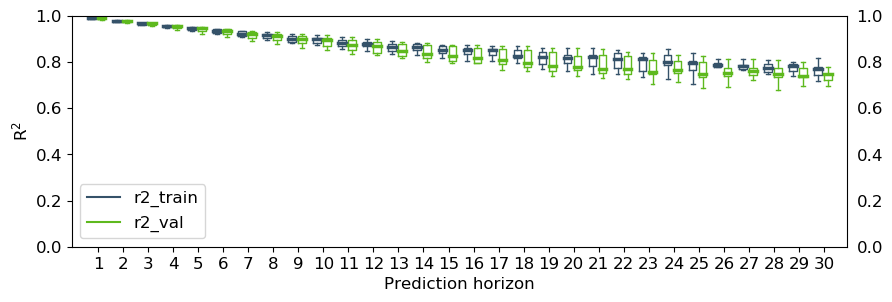

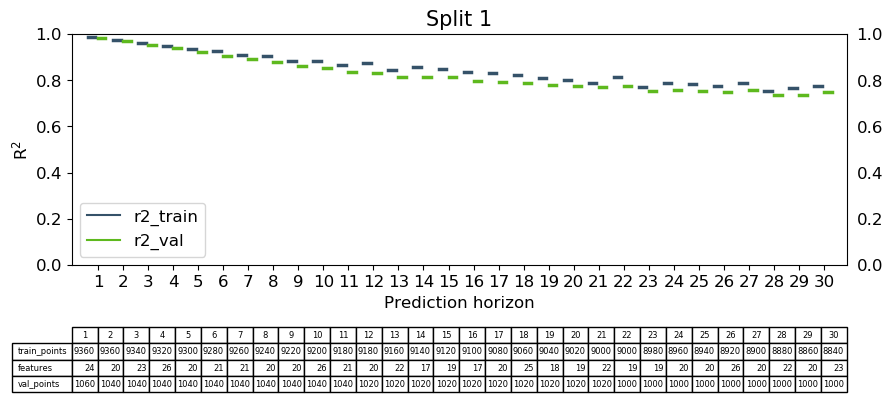

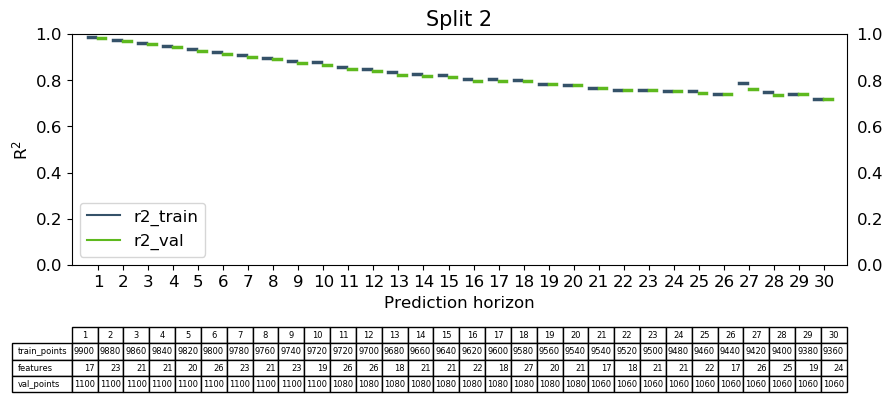

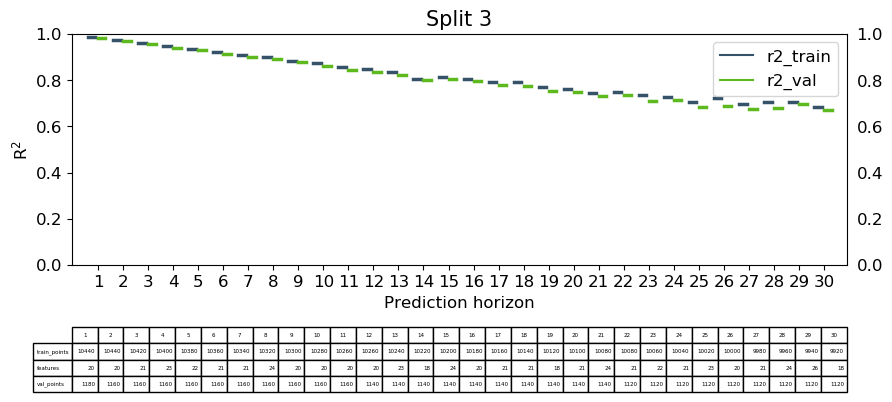

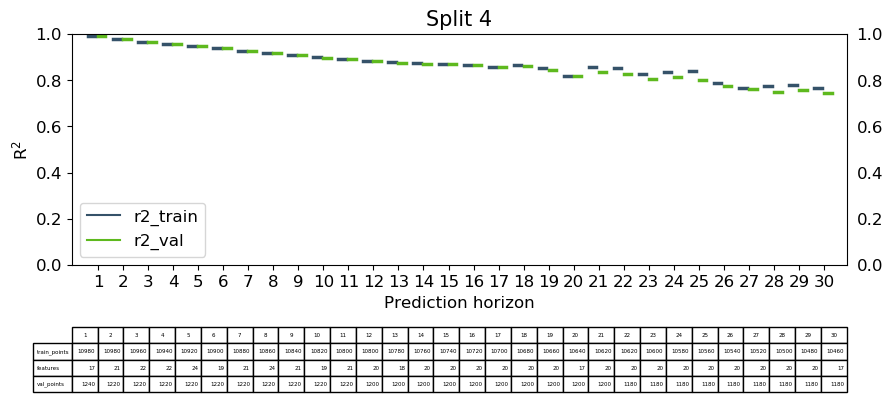

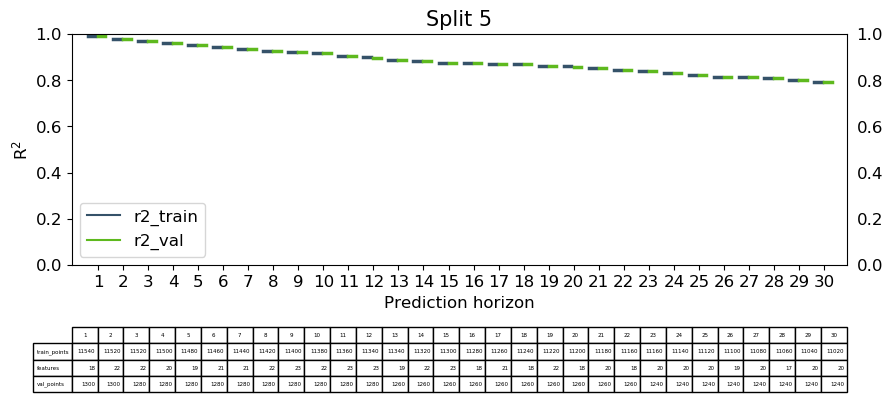

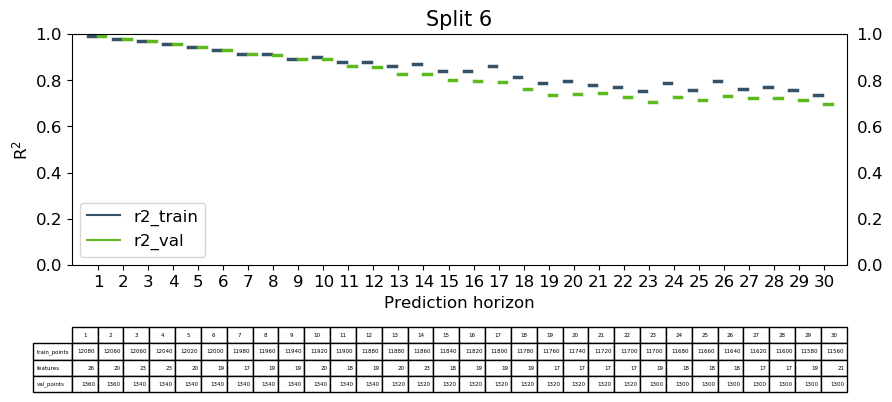

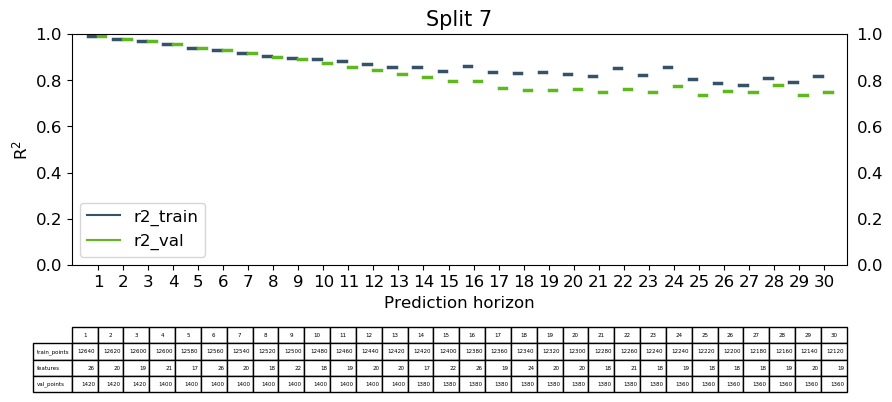

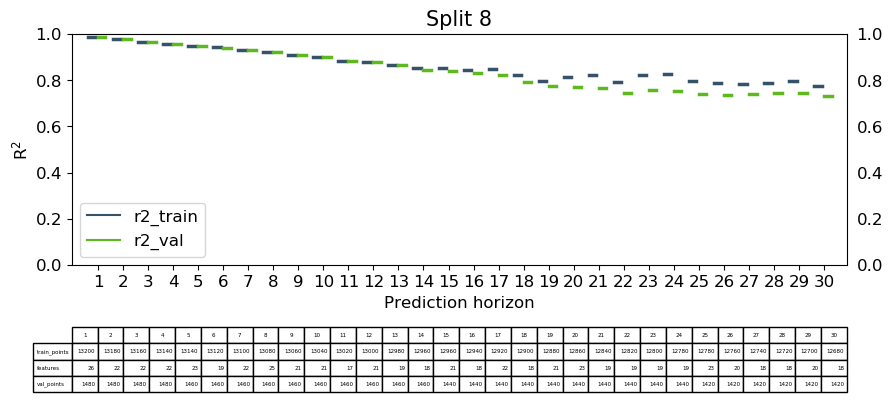

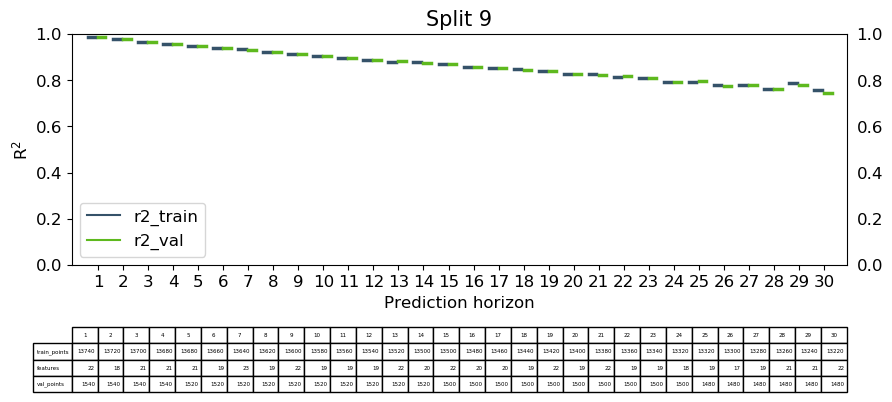

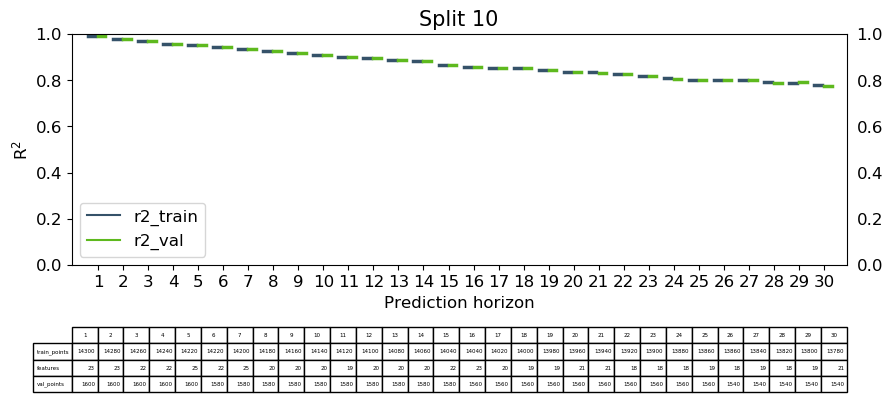

In [9]:
SPLITS = r2_results_hyper.columns.get_level_values(0).unique()

fig, ax = plt.subplots(figsize = (10, 3))    
plot_r2_box_plot(r2_results_hyper, ax, "r2_train", "r2_val", color1 = "#355269", color2 = "#5eb91e")
fig.savefig(dir_output + f"/r2_hyper.png" , bbox_inches = "tight", dpi = 300)
for split in SPLITS:
    fig, ax = plt.subplots(figsize = (10, 3))    
    plot_r2_box_plot(r2_results_hyper[[split]], ax, "r2_train", "r2_val", title = f"Split {split}",
                     table = shapes_list[split].transpose(), color1 = "#355269", color2 = "#5eb91e");

# Forecasting

In [10]:
# Load forecasting results.
xls = pd.ExcelFile(dir_results + "/forecast.xlsx")

forecast_splits = dict()
for i,split in enumerate(xls.sheet_names):
    if i == 0:
        df = pd.read_excel(xls, split, index_col = 0, header = [0, 1, 2])
    else:
        forecast_split = pd.read_excel(xls, split, index_col = 0, header = [0, 1, 2])
        # Reset the index.
        forecast_split.index = np.arange(1, len(forecast_split) + 1)
        forecast_split.index.names = ["Prediction horizon"]
        # Save the predictions.
        forecast_splits[split] = forecast_split
    
forecast_splits = pd.concat(forecast_splits, axis = 1)
forecast_splits.head()

Split 1                                                  \
Country               Yemen                                                   
AdminStrata           Abyan                         Aden                      
Indicator               FCG   Forecast    Naive      FCG   Forecast   Naive   
Prediction horizon                                                            
1                   33.8163  34.228207  33.5917  28.3226  26.716885  26.548   
2                   33.5809  33.892973  33.5917  28.6218  26.605536  26.548   
3                   33.3487  33.678433  33.5917  28.5255  26.580750  26.548   
4                   37.2396  33.571434  33.5917  27.2494  26.624436  26.548   
5                   36.1143  33.558823  33.5917  28.0367  26.718502  26.548   

                                                           ... Split 10  \
Country                                                    ...    Yemen   
AdminStrata        Al Bayda                    Al Dhale'e  ...   Sa'ada   
Indicator               FCG   Forecast   Naive        FCG  ...    Naive   
Prediction horizon                                         ...            
1                   53.6394  55.510444  55.541    56.7963  ...  40.3751   
2                   53.1773  55.406341  55.541    57.5593  ...  40.3751   
3                   51.7404  55.321759  55.541    56.1376  ...  40.3751   
4                   52.0785  55.249645  55.541    54.3724  ...  40.3751   
5                   52.8980  55.182948  55.541    53.8939  ...  40.3751   

                                                                              \
Country                                                                        
AdminStrata          Sana'a                      Shabwah                       
Indicator               FCG   Forecast    Naive      FCG   Forecast    Naive   
Prediction horizon                                                             
1                   42.6981  44.493298  44.2104  52.8051  53.654632  53.3521   
2                   43.8512  44.274371  44.2104  52.4924  53.180176  53.3521   
3                   44.5177  44.148808  44.2104  54.2902  52.891964  53.3521   
4                   44.6783  44.102238  44.2104  55.4377  52.754999  53.3521   
5                   42.8225  44.120291  44.2104  55.5760  52.734284  53.3521   

                                                 
Country                                          
AdminStrata           Taizz                      
Indicator               FCG   Forecast    Naive  
Prediction horizon                               
1                   41.5994  44.846629  44.5244  
2                   40.7057  44.530536  44.5244  
3                   42.4463  44.296124  44.5244  
4                   42.9934  44.130960  44.5244  
5                   44.3141  44.022612  44.5244  

[5 rows x 600 columns]

In [11]:
training_shape = pd.read_csv(dir_results + "/training_shapes.csv", header = [0,1], index_col = 0)
training_shape.head()

Split         Split 1                  Split 2                  Split 3  \
Info  training points features training points features training points   
1               10420       24           11000       17           11620   
2               10400       20           10980       23           11600   
3               10380       23           10960       21           11580   
4               10360       26           10940       21           11560   
5               10340       20           10920       20           11540   

Split                  Split 4                  Split 5           \
Info  features training points features training points features   
1           20           12220       17           12840       18   
2           20           12200       21           12820       22   
3           21           12180       22           12800       22   
4           23           12160       22           12780       20   
5           22           12140       24           12760       19   

Split         Split 6                  Split 7                  Split 8  \
Info  training points features training points features training points   
1               13440       26           14060       26           14680   
2               13420       20           14040       20           14660   
3               13400       23           14020       19           14640   
4               13380       23           14000       21           14620   
5               13360       20           13980       17           14600   

Split                  Split 9                 Split 10           
Info  features training points features training points features  
1           26           15280       22           15900       23  
2           22           15260       18           15880       23  
3           22           15240       21           15860       22  
4           22           15220       21           15840       22  
5           23           15200       21           15820       25

In [12]:
loss_sites = pd.read_csv(dir_results + "/loss_sites.csv", index_col = [0, 1], header = [0, 1])
loss_sites.head()

Split                  Split 1              Split 10               Split 2  \
Type                 mse_model  mse_naive  mse_model  mse_naive  mse_model   
Country AdminStrata                                                          
Yemen   Abyan        24.920125   4.922155  23.048315   2.596294  25.102797   
        Aden          1.783987   2.456993   8.408001  32.175648   4.165756   
        Al Bayda     33.810773  55.623102   3.316772   2.296727  10.356801   
        Al Dhale'e   21.552142  42.680955   7.526164   5.162301   4.059643   
        Al Hudaydah  10.142046   9.791295   1.672036   7.866425   6.228614   

Split                             Split 3               Split 4             \
Type                 mse_naive  mse_model  mse_naive  mse_model  mse_naive   
Country AdminStrata                                                          
Yemen   Abyan         1.684034   6.305647   5.796971   6.317027   4.175584   
        Aden          5.184039   8.958494   5.482646   1.035909  11.437863   
        Al Bayda      6.040451  18.629797  25.045918   3.840273  43.531354   
        Al Dhale'e   15.453605   2.969039   2.302465  15.170287  88.459867   
        Al Hudaydah   9.435208   5.325898   2.692284   2.094593   2.866904   

Split                  Split 5              Split 6               Split 7  \
Type                 mse_model  mse_naive mse_model  mse_naive  mse_model   
Country AdminStrata                                                         
Yemen   Abyan        28.869038  17.765094  5.039286   3.840514  17.047424   
        Aden          6.237461   6.664560  3.495396   1.628246   7.502128   
        Al Bayda     93.992710  55.365287  6.980616   6.564782  52.184012   
        Al Dhale'e   23.392154  29.208086  1.776856  11.551643   3.806507   
        Al Hudaydah  15.812236  14.471344  3.500186   2.177530   2.907923   

Split                             Split 8               Split 9             
Type                 mse_naive  mse_model  mse_naive  mse_model  mse_naive  
Country AdminStrata                                                         
Yemen   Abyan        46.828456  35.590853  44.557904   2.444960   2.898569  
        Aden          7.273919   6.485729  17.523471  27.047398  25.670936  
        Al Bayda      6.401660  14.036109   6.163461  11.355861   5.561421  
        Al Dhale'e    3.045781  32.249047  17.157256   9.125809   5.442165  
        Al Hudaydah   2.679240  17.146874   4.062847   6.375890   4.184184

In [13]:
loss_h = pd.read_csv(dir_results + "/loss_h.csv", index_col = [0, 1], header = [0, 1])
loss_h.head()

Split                        Split 1            Split 10             Split 2  \
Type                       mse_model mse_naive mse_model mse_naive mse_model   
Country Prediction horizon                                                     
Yemen   1                   0.892681  0.939103  1.449188  1.315197  1.128472   
        2                   1.855709  2.109219  2.517466  2.585327  2.406888   
        3                   5.160383  5.714559  2.736162  2.769154  5.037297   
        4                   5.232236  5.837641  3.882175  3.794114  7.706904   
        5                   7.817697  8.449338  4.633096  3.868749  9.785297   

Split                                   Split 3             Split 4            \
Type                        mse_naive mse_model mse_naive mse_model mse_naive   
Country Prediction horizon                                                      
Yemen   1                    1.173469  0.838267  0.600948  0.728533  0.618095   
        2                    2.842391  1.932940  1.758426  1.566696  1.886553   
        3                    5.957429  2.416204  2.185603  1.357157  2.895767   
        4                    9.259777  2.186927  1.791479  1.874910  3.957556   
        5                   12.019295  3.457872  3.491713  2.618387  6.446770   

Split                        Split 5             Split 6             Split 7  \
Type                       mse_model mse_naive mse_model mse_naive mse_model   
Country Prediction horizon                                                     
Yemen   1                   0.442318  0.330632  1.316365  1.245638  0.846765   
        2                   1.761033  1.435605  2.016195  2.070214  1.719389   
        3                   3.066260  2.404251  3.852213  4.628615  4.778107   
        4                   5.020163  3.931279  4.537589  5.724273  5.119979   
        5                   9.237765  6.990794  3.925222  4.944836  6.027261   

Split                                  Split 8             Split 9            
Type                       mse_naive mse_model mse_naive mse_model mse_naive  
Country Prediction horizon                                                    
Yemen   1                   0.579478  0.483915  0.416228  1.507511  1.142622  
        2                   1.338666  0.900735  0.696497  2.669428  2.628987  
        3                   3.760728  2.656130  2.129639  3.868232  4.254725  
        4                   4.410411  3.342748  2.808405  4.094754  4.969025  
        5                   5.540683  5.856618  5.208835  5.143005  5.948917

In [14]:
r2_results = pd.read_csv(dir_results + "/r2_results.csv", index_col = 0, header = [0, 1, 2])
r2_results.head()

Country                Yemen                                          \
Split                Split 1            Split 10             Split 2   
Type                r2_model  r2_naive  r2_model  r2_naive  r2_model   
Prediction horizon                                                     
1                   0.991199  0.990741  0.983312  0.984855  0.983181   
2                   0.981834  0.979353  0.972194  0.971445  0.964621   
3                   0.948410  0.942869  0.969957  0.969595  0.925138   
4                   0.945803  0.939532  0.957244  0.958214  0.890254   
5                   0.918468  0.911881  0.949095  0.957493  0.860147   

Country                                                               \
Split                          Split 3             Split 4             
Type                r2_naive  r2_model  r2_naive  r2_model  r2_naive   
Prediction horizon                                                     
1                   0.982511  0.991363  0.993808  0.993940  0.994858   
2                   0.958220  0.980321  0.982098  0.986606  0.983872   
3                   0.911464  0.975763  0.978076  0.987975  0.974342   
4                   0.868141  0.977102  0.981242  0.983233  0.964609   
5                   0.828218  0.963282  0.962923  0.975317  0.939228   

Country                                                               \
Split                Split 5             Split 6             Split 7   
Type                r2_model  r2_naive  r2_model  r2_naive  r2_model   
Prediction horizon                                                     
1                   0.993716  0.995303  0.985476  0.986256  0.987913   
2                   0.976175  0.980578  0.977515  0.976913  0.975257   
3                   0.955826  0.965363  0.955598  0.946649  0.932078   
4                   0.927822  0.943478  0.948879  0.935510  0.927667   
5                   0.876712  0.906701  0.957060  0.945906  0.915886   

Country                                                               
Split                          Split 8             Split 9            
Type                r2_naive  r2_model  r2_naive  r2_model  r2_naive  
Prediction horizon                                                    
1                   0.991728  0.995293  0.995952  0.985259  0.988827  
2                   0.980736  0.991148  0.993155  0.972869  0.973280  
3                   0.946540  0.973883  0.979060  0.961527  0.957683  
4                   0.937691  0.967055  0.972322  0.957350  0.948243  
5                   0.922676  0.945003  0.951086  0.947613  0.939404

## Total prediction loss for the sites among the various splits

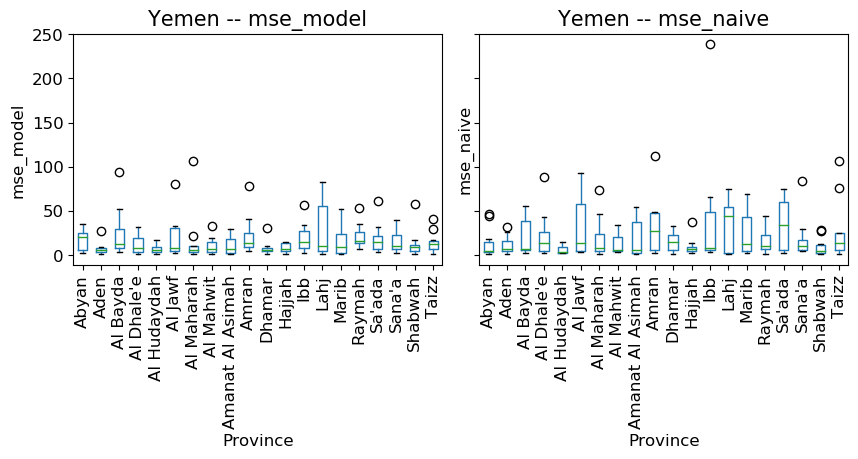

In [15]:
COUNTRIES = loss_sites.index.get_level_values(0).unique()
TYPES = loss_sites.columns.get_level_values(1).unique()

# Define the number of figures on x axis.
cols = 2
# Define the number of figures on y axis.
rows = len(COUNTRIES)
# Define the subplot figure.
fig, axs = plt.subplots(rows, cols, sharey = True, figsize = (5*cols, 3*rows), squeeze = False)
fig.subplots_adjust(wspace = 0.1, hspace = 0.8)
for j,country in enumerate(COUNTRIES):
    for i,m in enumerate(TYPES):         
        value = loss_sites.loc[country].xs(m, axis = 1, level = 1, drop_level = False)
        # Create box-plot.
        value.transpose().reset_index(drop = True).boxplot(rot = 90, ax = axs[j,i])
        # Set attributes box-plot.
        axs[j,i].set_title(f"{country} -- {m}")
        axs[j,i].set_xlabel("Province")
        axs[j,i].set_ylabel(m)
        axs[j,i].grid(b = None)

## Loss of each split as function of the prediction horizon

In [16]:
colors = ["dodgerblue", "deeppink"]

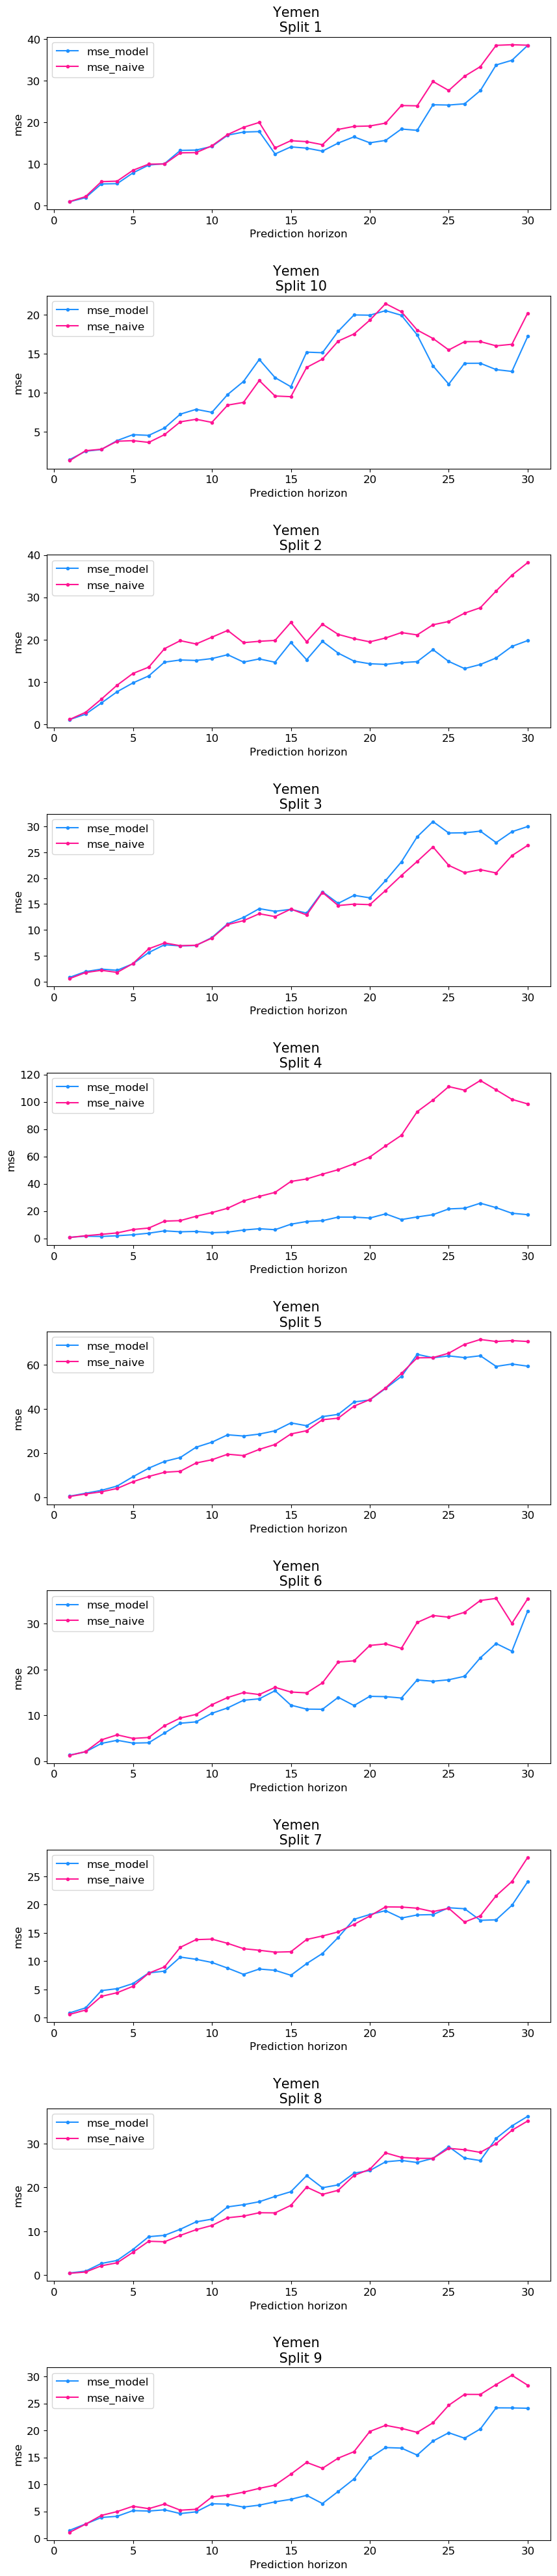

In [17]:
COUNTRIES = loss_h.index.get_level_values(0).unique()
SPLITS = loss_h.columns.get_level_values(0).unique()
TYPES = loss_h.columns.get_level_values(1).unique()

# Define the number of figures on x axis.
cols = len(COUNTRIES)
# Define the number of figures on y axis.
rows = len(SPLITS)
# Define the subplot figure.
fig, axs = plt.subplots(rows, cols, figsize = (10*cols, 5*rows), squeeze = False)
fig.subplots_adjust(wspace = 0.05, hspace = 0.5)
for j,country in enumerate(COUNTRIES):
    for i,split in enumerate(SPLITS):      
        value = loss_h.loc[(country, split)]
        for k,m in enumerate(TYPES):  
            # Plot.
            value[m].plot(style = ".-", label = m, ax = axs[i,j], c = colors[k])
            # Set attributes of the plot.
            axs[i,j].set_title(f"{country} \n {split}")
            axs[i,j].legend(loc = "best")
            axs[i,j].set_xlabel("Prediction horizon")
            axs[i,j].set_ylabel("mse")

## Total loss over the splits as function of the prediction horizon

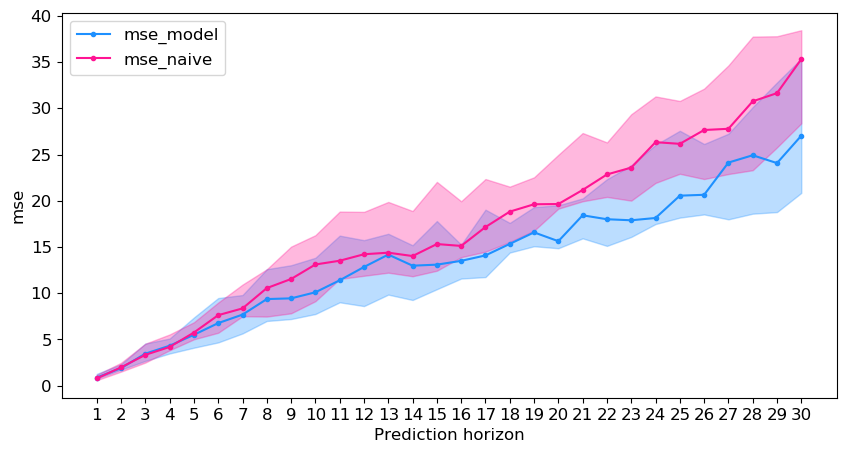

In [18]:
COUNTRIES = loss_h.index.get_level_values(0).unique()
SPLITS = loss_h.columns.get_level_values(0).unique()
TYPES = loss_h.columns.get_level_values(1).unique()

for j,country in enumerate(COUNTRIES):
    fig, axs = plt.subplots(figsize = (10, 5))    
    for i,m in enumerate(TYPES):  
        value = loss_h.loc[country].xs(m, axis = 1, level = 1, drop_level = False)
        value_statistic = value.agg([lambda x: x.quantile(0.25), np.median, lambda x: x.quantile(0.75)], axis = 1)
        value_statistic.columns = ["lower_quantile", "median", "upper_quantile"]

        # Plot.
        value_statistic["median"].plot(style = ".-", label = m, ax = axs, c = colors[i])
        axs.fill_between(x = value_statistic["median"].index, y1 = value_statistic["lower_quantile"], 
                         y2 = value_statistic["upper_quantile"], color = colors[i], alpha = 0.3)
        # Set attributes of the plot.
        axs.legend(loc = "upper left")
        axs.set_xlabel("Prediction horizon")
        axs.set_ylabel("mse")
        axs.set_xticks(np.arange(1, len(value_statistic)+1))

        fig.savefig(dir_output + f"/Loss_{country}.png", bbox_inches = "tight", dpi = 300)

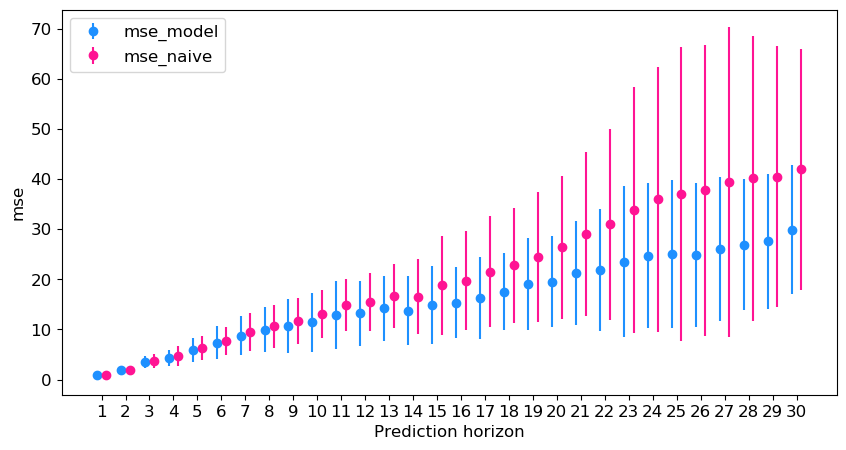

In [19]:
COUNTRIES = loss_h.index.get_level_values(0).unique()
SPLITS = loss_h.columns.get_level_values(0).unique()
TYPES = loss_h.columns.get_level_values(1).unique()

for j,country in enumerate(COUNTRIES):
    fig, axs = plt.subplots(figsize = (10, 5))    
    for i,m in enumerate(TYPES):  
        value = loss_h.loc[country].xs(m, axis = 1, level = 1, drop_level = False)
        value_statistic = value.agg([np.mean, np.std], axis = 1)
        value_statistic.columns = ["mean", "std"]

        # Plot.
        if i == 0:
            trans1 = Affine2D().translate(-0.2, 0.0) + axs.transData
            axs.errorbar(value_statistic.index, value_statistic["mean"], yerr = value_statistic["std"], marker = "o", 
                         linestyle = "none", transform = trans1, c = colors[i], label = m)
        else:
            trans2 = Affine2D().translate(+0.2, 0.0) + axs.transData
            axs.errorbar(value_statistic.index, value_statistic["mean"], yerr = value_statistic["std"], marker = "o", 
                         linestyle = "none", transform = trans2, c = colors[i], label = m)
        
        # Set attributes of the plot.
        axs.legend(loc = "upper left")
        axs.set_xlabel("Prediction horizon")
        axs.set_ylabel("mse")
        axs.set_xticks(np.arange(1, len(value_statistic)+1))

        fig.savefig(dir_output + f"/Loss_{country}_mean.png", bbox_inches = "tight", dpi = 300)

## r2 scores

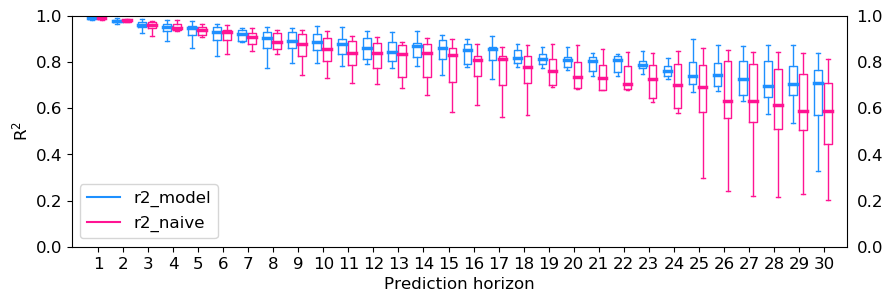

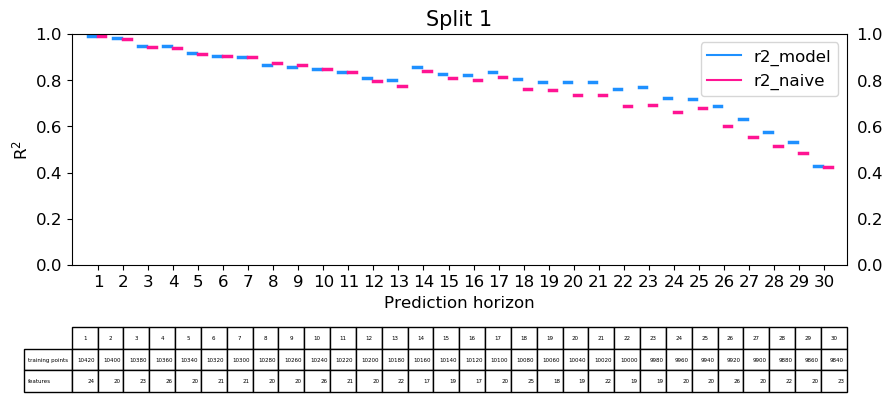

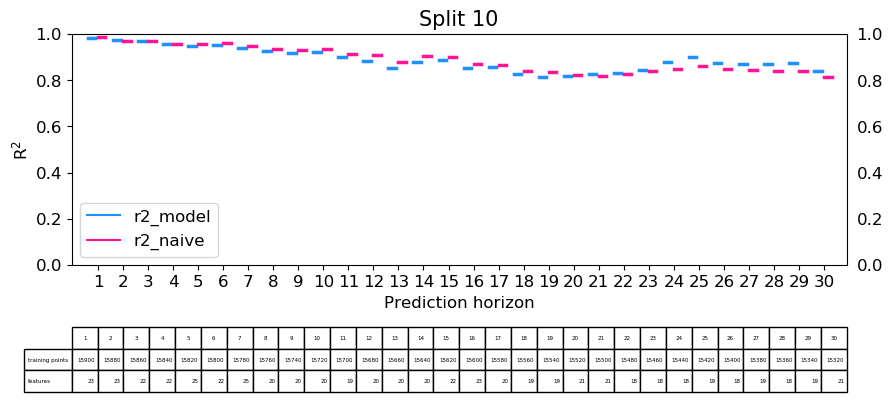

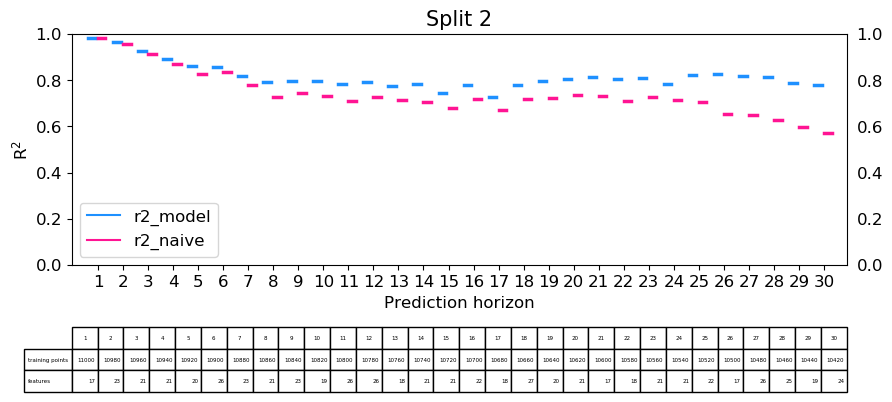

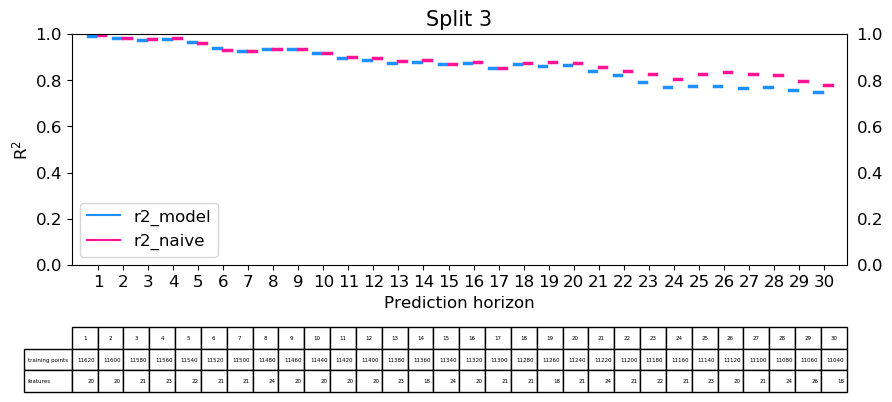

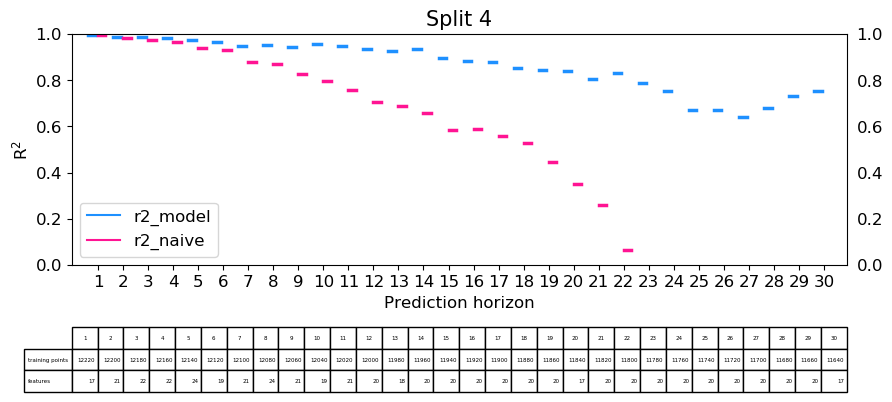

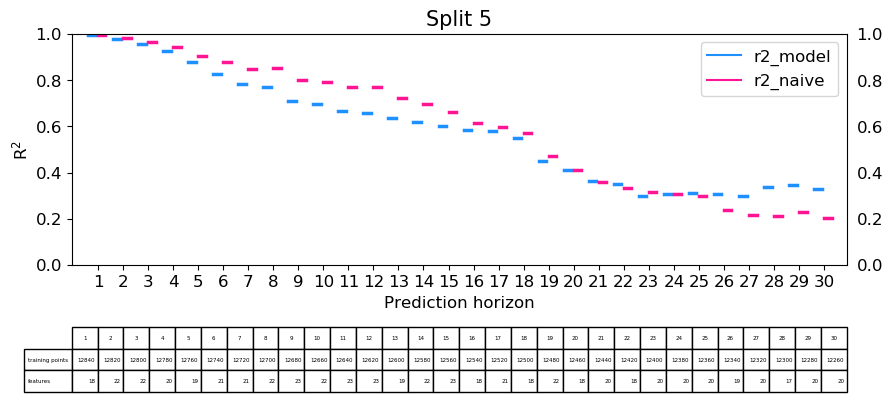

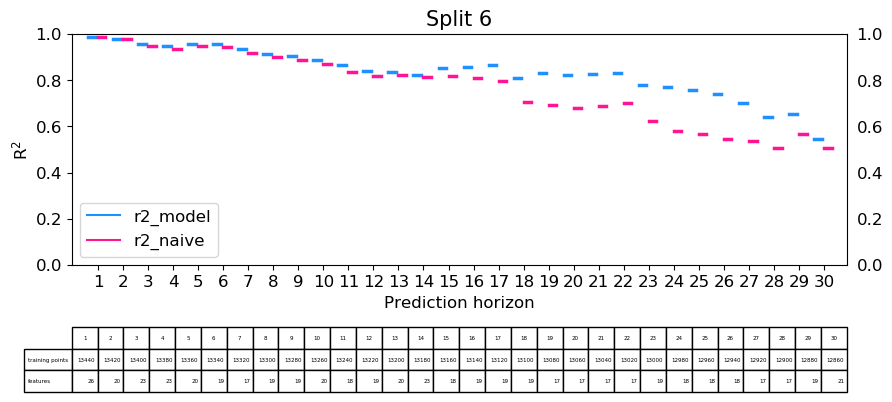

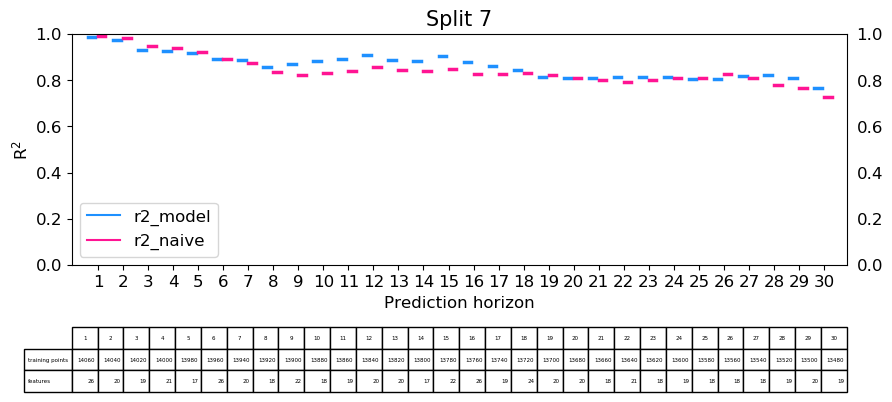

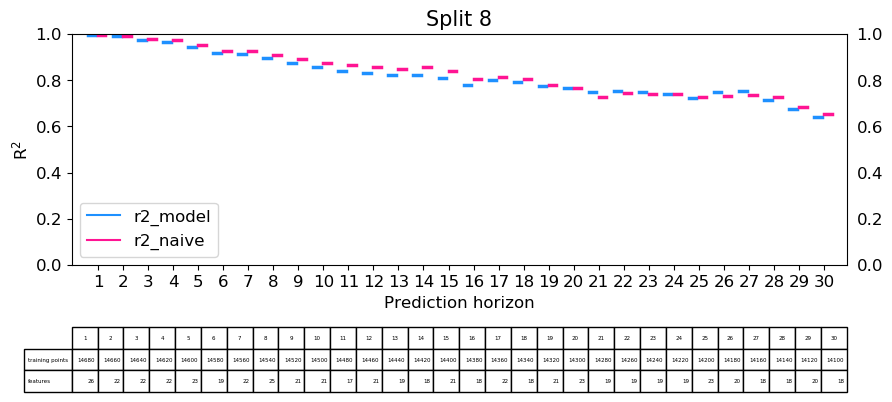

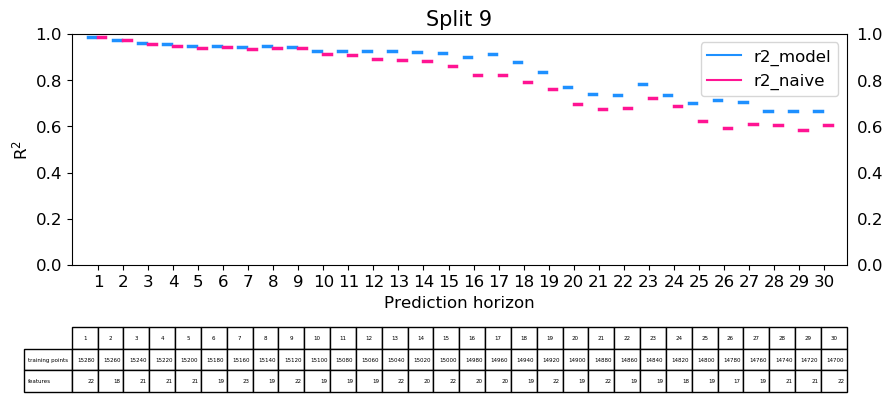

In [20]:
COUNTRIES = r2_results.columns.get_level_values(0).unique()
SPLITS = r2_results.columns.get_level_values(1).unique()

for country in COUNTRIES:
    fig, ax = plt.subplots(figsize = (10, 3))    
    plot_r2_box_plot(r2_results[country], ax, "r2_model", "r2_naive")
    fig.savefig(dir_output + f"/r2_{country}.png" , bbox_inches = "tight", dpi = 300)
    for split in SPLITS:
        fig, ax = plt.subplots(figsize = (10, 3))    
        plot_r2_box_plot(r2_results[country][[split]], ax, "r2_model", "r2_naive", title = split,
                         table = training_shape[split].transpose());

## Actual vs Forecast

In [21]:
mStyles = ["s","+","x","h","v","^","o","H","*","D"]

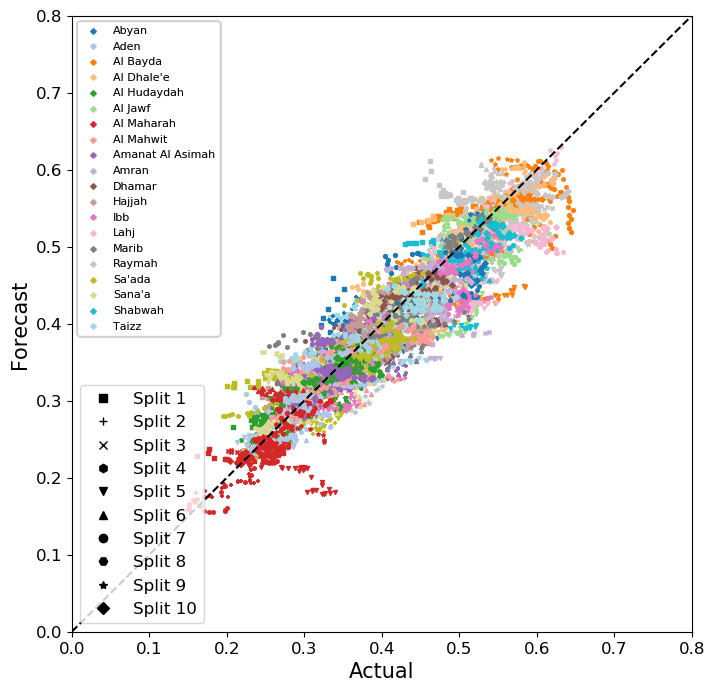

In [22]:
COUNTRIES = forecast_splits.columns.get_level_values(1).unique()
PROVINCES = forecast_splits.columns.get_level_values(2).unique()
SPLITS = forecast_splits.columns.get_level_values(0).unique()

colors = {country: plt.get_cmap("tab20")(i) for i,country in enumerate(PROVINCES)}

for country in COUNTRIES:
    fig, axs = plt.subplots(figsize = (8, 8))
    # Add bisector.
    axs.plot(axs.get_xlim(), axs.get_ylim(), color = "black", linestyle = "--")

    for i,split in enumerate(SPLITS):
        predictions = forecast_splits[(split, country)]
        predictions = predictions.drop(["Naive"], axis = 1, level = 1)
        predictions = predictions/100
   
        def plot_scatter(group):
            gr = group[group.name]
            gr.plot.scatter(x = "FCG", y = "Forecast", s = 8, marker = mStyles[i], color = colors[group.name], 
                            ax = axs, label = group.name)

        predictions.groupby(axis = 1, level = 0).apply(plot_scatter)

        # Legend.
        handles, labels = plt.gca().get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        leg = plt.legend(by_label.values(), by_label.keys(), loc = "upper left", prop = {"size": 8})
        axs.add_artist(leg)
        h = [plt.plot([],[], color = "black", marker = mStyles[i], ls = "")[0] for i,cplit in enumerate(SPLITS)]
        axs.legend(handles = h, labels = [split for split in SPLITS], loc = "lower left")
        axs.set_xlim(0, 0.8)
        axs.set_ylim(0, 0.8)

    axs.set_xlabel("Actual", fontsize = 15)
    axs.set_ylabel("Forecast", fontsize = 15)

    fig.savefig(dir_output + f"/scatter_{country}.png", bbox_inches = "tight", dpi = 300)